In [22]:
#pip install tensorflow-gpu

In [71]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [72]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [73]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [74]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
## divide the dataset into independent and dependent feature

x=dataset.drop(['RowNumber','CustomerId','Surname','Exited'], axis = 1)
y=dataset['Exited']

In [76]:
x.shape

(10000, 10)

In [77]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [78]:
## feature engineering
geography=pd.get_dummies(x['Geography'], drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [79]:
print(geography.shape)
print(gender.shape)

(10000, 2)
(10000, 1)


In [80]:
x=x.drop(['Geography','Gender'],axis=1)
x.shape

(10000, 8)

In [81]:
x.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.0,1,1,1,101348.88


In [82]:
## concatenate these variables with dataframe
x=pd.concat([x,geography,gender],axis=1)


In [83]:
x.shape

(10000, 11)

In [84]:
#splitting the dataset into Train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [85]:
x_train.shape

(8000, 11)

In [86]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [87]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [88]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [89]:
x_train.shape

(8000, 11)

In [90]:
# part 2 now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [117]:
## Lets initialize ANN
classifier=Sequential()

In [118]:
## Adding the input layer units=11 because 
##we have 11 feature in dataset after train test
classifier.add(Dense(units=11, activation='relu'))

In [119]:
# adding the First hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [120]:
# adding the Second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [121]:
## Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [122]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [123]:
classifier.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
## Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [125]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4658 - accuracy: 0.8018 - val_loss: 0.4156 - val_accuracy: 0.8171
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4080 - accuracy: 0.8272 - val_loss: 0.3695 - val_accuracy: 0.8436
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3882 - accuracy: 0.8388 - val_loss: 0.3801 - val_accuracy: 0.8436
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3798 - accuracy: 0.8429 - val_loss: 0.3703 - val_accuracy: 0.8398
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3826 - accuracy: 0.8403 - val_loss: 0.3690 - val_accuracy: 0.8421
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3805 - accuracy: 0.8431 - val_loss: 0.3660 - val_accuracy: 0.8512
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3717 - accuracy: 0.8453 - val_loss: 0.3632 - val_accuracy:

In [126]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

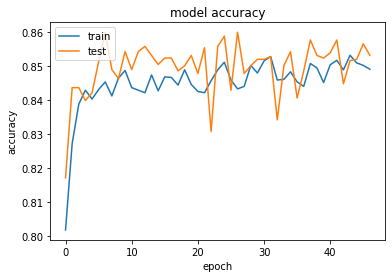

In [129]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

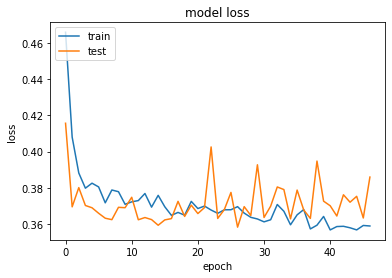

In [130]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [131]:
# part 3- Making Prediction and eveluating the model

# predicting the Test set results
y_pred= classifier.predict(x_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [132]:
## make the confusion metrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1553,   42],
       [ 222,  183]])

In [133]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [134]:
score

0.868